# Welcome to Machine Learning -- An Interdisciplinary Introduction

## K-Means Clustering

A clustering task is defined as automatically grouping similar data points together.
One simple yet effective clustering algorithms is K-Means.
Given is a set of samples without labels:
$$X = \{\vec x_n \mid 0\leq n<N \}\,.$$
The task is to assign these samples to groups, i.e., we assing class/cluster labels:
$$Y=\{y_n \in\{0,\ldots,K-1\} \mid 0\leq n<N\}\,.$$

### Expectation Maximization

The K-Means algorithm is an iterative algorithm that performs two steps.
For estimating clusters, K-Means starts with defining initial cluster means by simply randomly taking $K$ of the data points:
$$M = \{\vec\mu_k \mid 0\leq k < K\}$$

Now, two iterative steps are executed repeatedly.
1. Compute the distances between all samples $X$ and all means M: 
   $$D_{k,n} = \|\vec x_n- \vec \mu_k\|^2$$
   For each sample $\vec x_n$, the cluster label is assigned to the closest class:
   $$y_n = \argmin\limits_{0\leq k<K} D_{k,n}\,.$$

2. Compute new cluster centers $M$ by taking the mean of all samples belonging to that cluster
   $$\forall 0\leq k<K\colon\vec\mu_k = \frac{\sum\limits_{0\leq n<N} \mathbb I(y_n = k) \vec x_n}{\sum\limits_{0\leq n<N} \mathbb I(y_n = k)}$$
   where $\mathbb I$ is an indicator function that is 1 if the condition is true, otherwise 0.
   Hence, the denominator counts the number of samples in cluster $k$.

This iteration is stopped when the assignments of the labels $Y$ did not change in the last round.


## Implementation

Implement a K-Means algorithm to cluster a given set of data points.
We perform the implementation in three steps.
First, we implement the cluster assignment function that assigns each sample to the cluster with the closest class mean.
Second, we implement a function that computes new means for the clusters.
Third, we run these two functions iteratively and implement a stopping criterion.
Finally, we create some data samples and run the K-Means algorithm to cluster them.

## Task 1: Assign Clusters

Given the current means $\vec mu_k$, assign each data point to the cluster with the closest mean.

In [1]:
import torch

def assign_clusters(X, M):
  """Provides cluster indices for all points in X by computing the closest distance to all centers in M
  
  Parameters:
  X: torch.tensor(float) in shape (N,D): The samples of the dataset that should be clustered
  M: torch.tensor(float) in shape (K,D): The current estimates of the cluster means

  Returns:
  torch.tensor(int) in shape (N): The cluster indexes for all samples in X
  """
  # compute distances between data points and centers
  D = torch.stack([torch.sum((X - m)**2, axis=1) for m in M])

  # assign new classes
  Y = torch.argmin(D, dim=0)

  # return classes
  return Y

## Task 2: Update Means

Given the current predictions of the clusters, compute the new means.

In [2]:
def compute_means(X, Y, K):
  """Computes K new means M based on the current cluster assignment Y
  
  Parameters:
  X: torch.tensor(float) in shape (N,D): The samples of the dataset that should be clustered
  Y: torch.tensor(int) in shape (N): The current estimates of the cluster labels for all samples
  K: int: The number of cluster centers to create

  Returns:
  torch.tensor(float) in shape (K,D): The estimated cluster means
  """  
  # compute the new means
  M = [torch.mean(X[Y == k], axis=0) for k in range(K)]

  # return them in form of a numpy array
  return torch.stack(M)

## Task 3: Run K-Means

Implement a function that takes a given dataset $X$ and a given cluster number $K$.
Perform iterative K-Means and return the cluster indexes for each data point.
Also return the means of the clusters (for later visualization).

In [3]:

def KMeans(X, K):
  # select the first means randomly
  M = X[torch.randperm(len(X))[:K]]

  # iterate the expectation maximization algorithm
  Y_old = None
  while True:
    # Step 1: assign clusters
    Y = assign_clusters(X, M)

    # implement the stopping criterion
    if Y_old is not None and torch.all(Y == Y_old):
      # breaking condition: clusters did not change
      return Y, M
    # remember the new cluster assignment for the next round
    Y_old = Y

    # Step 2: compute new means
    M = compute_means(X, Y, K)

## 2D Example Data

For testing our clustering algorithm, we generate 4 different 2D clusters randomly.
We select random values in four different Gaussian distributions.
Finally, we club all of them together to build our data samples.

In [4]:
# Generate four distributions
X1 = torch.distributions.normal.Normal(torch.tensor((-5.,-4.)), 1.5).sample([50])
X2 = torch.distributions.normal.Normal(torch.tensor((-4.,4.)), 1.5).sample([50])
X3 = torch.distributions.normal.Normal(torch.tensor((4.,5.)), 1.5).sample([50])
X4 = torch.distributions.normal.Normal(torch.tensor((3,-3.)), 1.5).sample([50])

# club them together
X = torch.cat((X1, X2, X3, X4))

For illustration purposes, we plot the four groups into one plot using one color per group.

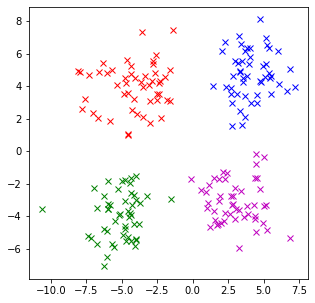

In [5]:
from matplotlib import pyplot

pyplot.figure(figsize=(5,5))

pyplot.plot(X1[:,0], X1[:,1], "gx")
pyplot.plot(X2[:,0], X2[:,1], "rx")
pyplot.plot(X3[:,0], X3[:,1], "bx")
pyplot.plot(X4[:,0], X4[:,1], "mx")

## Task 4: K-Means Clustering of Data Points

Select a suitable value of $K$ based on your assumptions.
Using the implemented K-Means algorithm, obtain the clusters and means for the produced data $X$.
Plot the data points, selecting the color based on the cluster index.
Also plot the estimated means into the same plot.

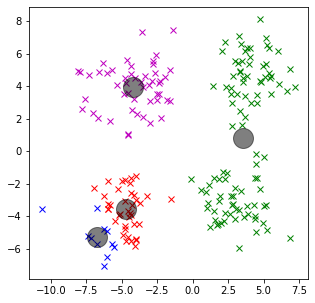

In [6]:
# Run the K-Means algorithm to obtain clusters and means
clusters, means = KMeans(X, 4)

# Plot the data points according to their cluster index
pyplot.figure(figsize=(5,5))
pyplot.plot(X[clusters==0,0], X[clusters==0,1], "gx")
pyplot.plot(X[clusters==1,0], X[clusters==1,1], "rx")
pyplot.plot(X[clusters==2,0], X[clusters==2,1], "bx")
pyplot.plot(X[clusters==3,0], X[clusters==3,1], "mx")

# plot th means of the clusters
pyplot.plot(means[:,0], means[:,1], "ko", ms=20, alpha=0.5)

## Task 5: Discuss Issues of k-Means

Problems of the k-nearest neighbor approach include the following:

* Selection of $K$: how can we find out how many clusters we have? What happens if we chose the wrong number, e.g., $K=2$ in our example?
* What is the optimal distance function to compare our samples?
* What happens if one of the clusters is empty in one iteration?
* How can badly initialized samples influence the clustering results?
* How to evaluate the quality of clustering if we have no ground truth?